<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Creating-a-circuit" data-toc-modified-id="Creating-a-circuit-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Creating a circuit</a></span><ul class="toc-item"><li><span><a href="#QAOA-problem-graph" data-toc-modified-id="QAOA-problem-graph-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>QAOA problem graph</a></span></li><li><span><a href="#Universal-interface" data-toc-modified-id="Universal-interface-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Universal interface</a></span><ul class="toc-item"><li><span><a href="#Cirq" data-toc-modified-id="Cirq-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Cirq</a></span></li><li><span><a href="#Qiskit" data-toc-modified-id="Qiskit-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Qiskit</a></span></li></ul></li></ul></li><li><span><a href="#Simulate-circuits" data-toc-modified-id="Simulate-circuits-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Simulate circuits</a></span><ul class="toc-item"><li><span><a href="#Using-qtree" data-toc-modified-id="Using-qtree-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Using qtree</a></span></li><li><span><a href="#Using-Cirq" data-toc-modified-id="Using-Cirq-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Using Cirq</a></span></li><li><span><a href="#Simulate-multiple-amplitudes" data-toc-modified-id="Simulate-multiple-amplitudes-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Simulate multiple amplitudes</a></span></li></ul></li><li><span><a href="#Use-lightcone-optimisaiton" data-toc-modified-id="Use-lightcone-optimisaiton-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Use lightcone optimisaiton</a></span><ul class="toc-item"><li><span><a href="#Use-qiskit-circuit-as-input" data-toc-modified-id="Use-qiskit-circuit-as-input-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Use qiskit circuit as input</a></span></li></ul></li><li><span><a href="#Optimization" data-toc-modified-id="Optimization-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Optimization</a></span><ul class="toc-item"><li><span><a href="#Get-line-graph" data-toc-modified-id="Get-line-graph-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Get line graph</a></span></li><li><span><a href="#Find-ordering" data-toc-modified-id="Find-ordering-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Find ordering</a></span></li></ul></li></ul></div>

# QTensor usage

## Creating a circuit


In [1]:
import qiskit
qiskit.__qiskit_version__

{'qiskit-terra': '0.12.0',
 'qiskit-aer': '0.4.1',
 'qiskit-ignis': '0.2.0',
 'qiskit-ibmq-provider': '0.6.0',
 'qiskit-aqua': '0.6.5',
 'qiskit': '0.17.0'}

In [4]:
# Qtensor branch: dev
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
from qtensor import QAOAComposer
from qtensor import CirqQAOAComposer, QtreeQAOAComposer


### QAOA problem graph

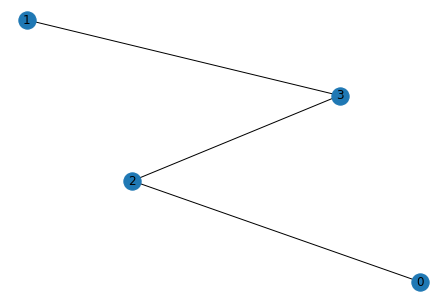

In [48]:

G = nx.erdos_renyi_graph(4, 2/(5-1))
nx.draw_kamada_kawai(G, with_labels=True)

### Universal interface
#### Cirq

In [49]:
p = 1
cirq_qaoa = CirqQAOAComposer(G, gamma=[.1]*p, beta=[.2]*p)
cirq_qaoa.ansatz_state()
cirq_qaoa.circuit

┌──┐           ┌──┐
0: ───H────@──────────────@─────X^0.4───────────────────────
           │              │
1: ───H────┼@─────────────┼@────X^0.4───────────────────────
           ││             ││
2: ───H────X┼────Z^0.2────X┼────@───────────────@───X^0.4───
            │              │    │               │
3: ───H─────X────Z^0.2─────X────X───────Z^0.2───X───X^0.4───
          └──┘           └──┘

#### Qiskit

In [42]:
from qtensor import QiskitQAOAComposer


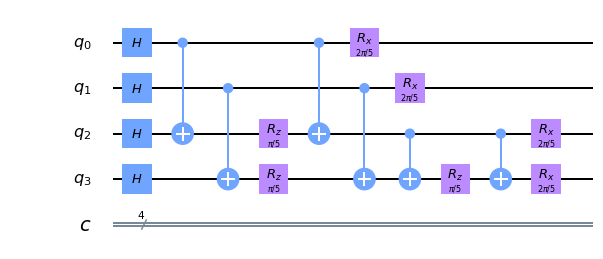

In [50]:
p = 1
qiskit_qaoa = QiskitQAOAComposer(G, gamma=[.1]*p, beta=[.2]*p)
qiskit_qaoa.ansatz_state()
qiskit_qaoa.circuit.draw('mpl')

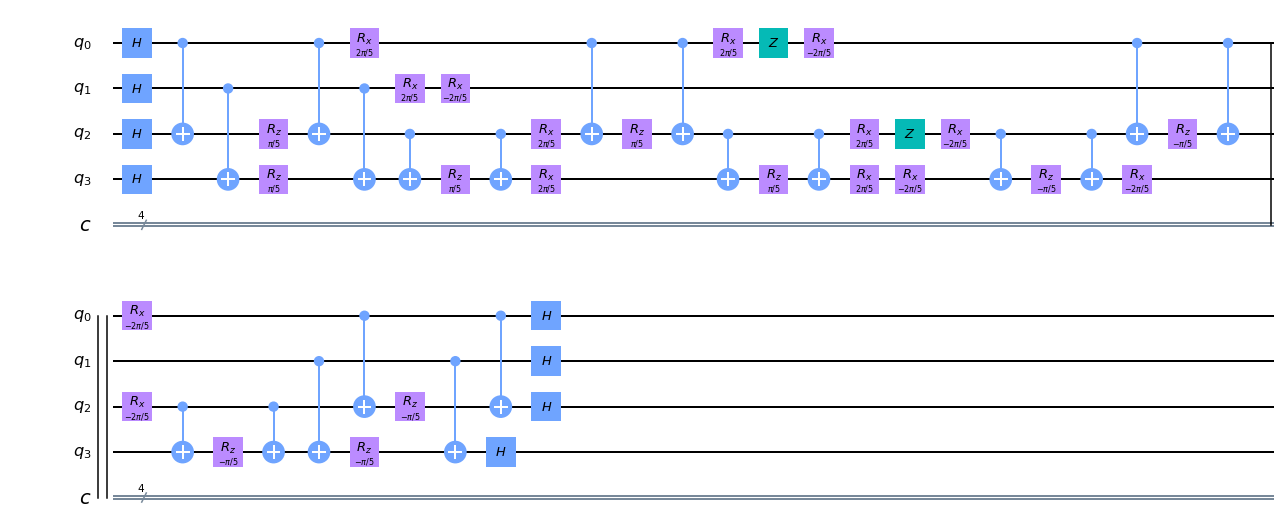

In [53]:
p = 2
qiskit_qaoa = QiskitQAOAComposer(G, gamma=[.1]*p, beta=[.2]*p)
qiskit_qaoa.energy_expectation_lightcone((0,2))
qiskit_qaoa.circuit.draw('mpl')

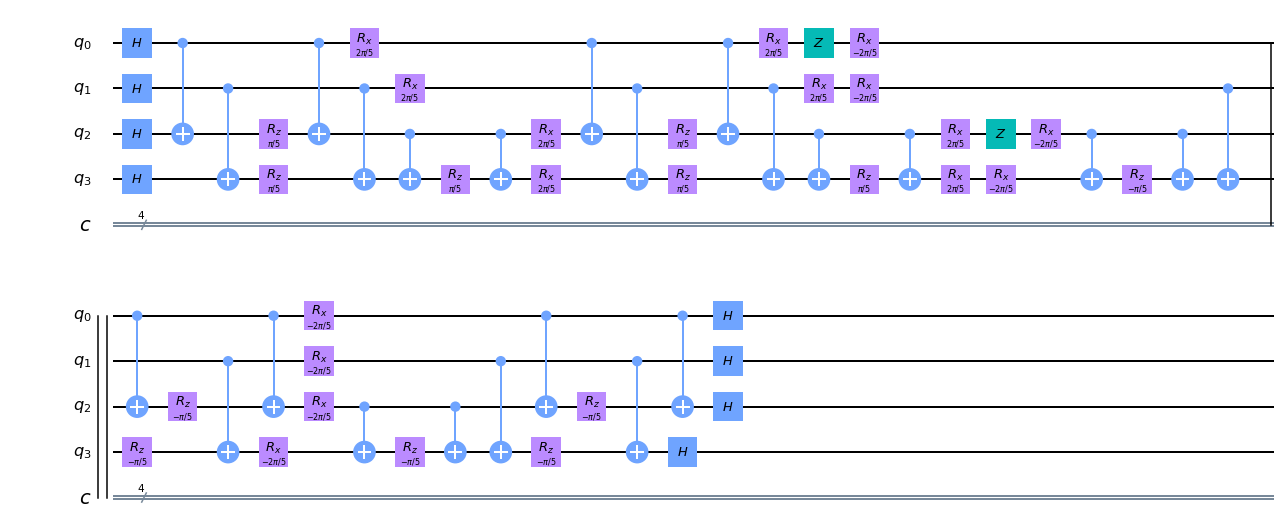

In [55]:
p = 2
qiskit_qaoa = QiskitQAOAComposer(G, gamma=[.1]*p, beta=[.2]*p)
qiskit_qaoa.energy_expectation_lightcone((0,2))
qiskit_qaoa.circuit.draw('mpl')

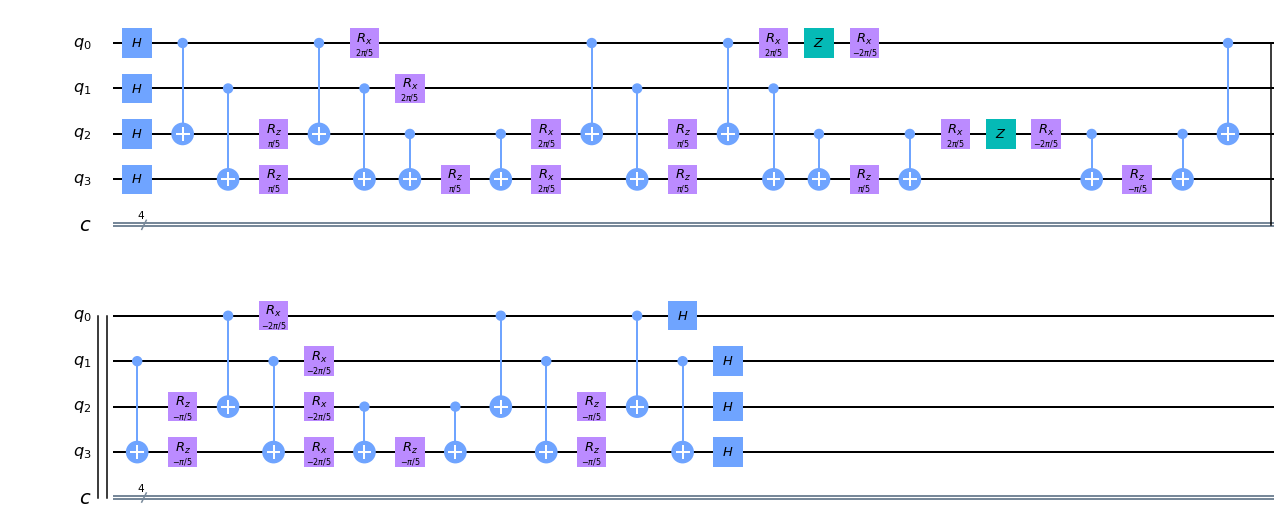

In [56]:
from qiskit import transpile

c = transpile(qiskit_qaoa.circuit, optimization_level=3)
c.draw('mpl')

## Simulate circuits
### Using qtree

In [8]:
from qensor import QtreeSimulator

In [9]:
com = QtreeQAOAComposer(G, gamma=[.1]*p, beta=[.2]*p)
com.ansatz_state()

[H(0),
 H(1),
 H(2),
 H(3),
 H(4),
 cX(0,3),
 ZPhase[alpha=0.20](3),
 cX(0,3),
 cX(0,4),
 ZPhase[alpha=0.20](4),
 cX(0,4),
 cX(1,2),
 ZPhase[alpha=0.20](2),
 cX(1,2),
 cX(1,3),
 ZPhase[alpha=0.20](3),
 cX(1,3),
 cX(2,3),
 ZPhase[alpha=0.20](3),
 cX(2,3),
 cX(2,4),
 ZPhase[alpha=0.20](4),
 cX(2,4),
 cX(3,4),
 ZPhase[alpha=0.20](4),
 cX(3,4),
 XPhase[alpha=0.40](0),
 XPhase[alpha=0.40](1),
 XPhase[alpha=0.40](2),
 XPhase[alpha=0.40](3),
 XPhase[alpha=0.40](4)]

In [10]:
sim = QtreeSimulator()
first_amp = sim.simulate(com.circuit)

first_amp

array([-0.39701423+0.22350602j])

### Using Cirq

In [11]:
from qensor import CirqSimulator

In [12]:
cirq_sim = CirqSimulator()
cirq_measure = cirq_sim.simulate(cirq_qaoa.circuit)

cirq_first_amp = cirq_measure.final_state[0]
cirq_first_amp

(-0.3970142+0.22350594j)

### Simulate multiple amplitudes

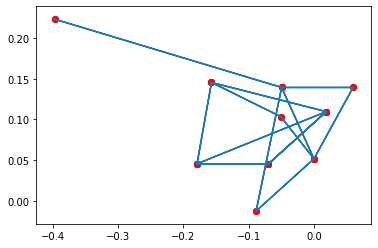

In [13]:
state = sim.simulate_batch(com.circuit, batch_vars=com.n_qubits)

# Plot real vs imaginary parts of Qtree vs Cirq simulator results
plt.plot(np.real(state), np.imag(state))
plt.scatter(*[f(cirq_measure.final_state) for f in [np.real, np.imag]], c='red')

# Check for correctness
assert np.allclose(state, cirq_measure.final_state)

## Use lightcone optimisaiton

In [46]:
com = QtreeQAOAComposer(G, gamma=[.1]*p, beta=[.2]*p)
com.energy_expectation_lightcone(list(G.edges())[0])


In [51]:
from qensor.QAOASimulator import QAOAQtreeSimulator
qaoa_sim = QAOAQtreeSimulator(QtreeQAOAComposer)

qaoa_sim.energy_expectation(G, gamma=[.1]*p, beta=[.2]*p)

Edge iteration: 100%|██████████| 7/7 [00:00<00:00, 25.81it/s]


array([1.80779892])

### Use qiskit circuit as input

In [14]:
from qtree.operators import from_qiskit_circuit

In [15]:
n, qc = from_qiskit_circuit(qiskit_qaoa.circuit)
all_gates = sum(qc, [])
sim.simulate(all_gates)

array([-0.39701423+0.22350602j])

## Optimization

In [29]:
from qensor.optimisation.TensorNet import QtreeTensorNet
from qensor.optimisation.Optimizer import TreeTrimSplitter, OrderingOptimizer

### Get line graph

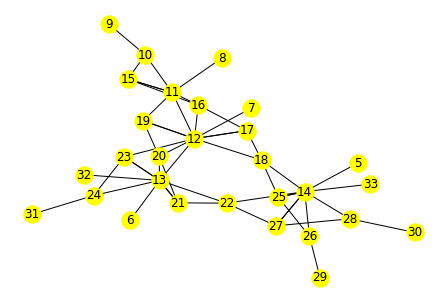

In [24]:
tn = QtreeTensorNet.from_qtree_gates(all_gates)
line_g = tn.get_line_graph()

nx.draw_kamada_kawai(line_g, with_labels=True, node_color='yellow')

### Find ordering

In [39]:
opt = OrderingOptimizer()
peo, tn = opt.optimize(tn)
print('Elimination order:', opt.peo)
opt.treewidth

Elimination order: [i_0, i_1, i_2, i_3, i_4, o_0, o_1, o_2, o_3, o_4, v_5, v_6, v_7, v_8, v_9, v_29, v_30, v_31, v_32, v_33, v_10, v_15, v_16, v_24, v_23, v_26, v_25, v_18, v_28, v_27, v_22, v_11, v_17, v_19, v_12, v_20, v_13, v_14, v_21]


4

In [41]:
opt = TreeTrimSplitter(tw_bias=26)
peo, slice_vars, tn = opt.optimize(tn)
opt.treewidth
print('Slice vars', slice_vars)

2020-09-08 14:27:13.965 | INFO     | qensor.optimisation.Optimizer:_get_max_tw:85 - Memory available: 6761467904
2020-09-08 14:27:13.969 | INFO     | qensor.optimisation.Optimizer:optimize:118 - Maximum treewidth: 28
2020-09-08 14:27:13.973 | INFO     | qensor.optimisation.Optimizer:_split_graph:157 - Treewidth: 4
2020-09-08 14:27:13.977 | INFO     | qensor.optimisation.Optimizer:_split_graph:158 - Target treewidth: 2


Slice vars [v_14, v_12, v_13, v_11]


In [ ]:
d